Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'urca' was built under R version 3.6.3"



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.0448 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


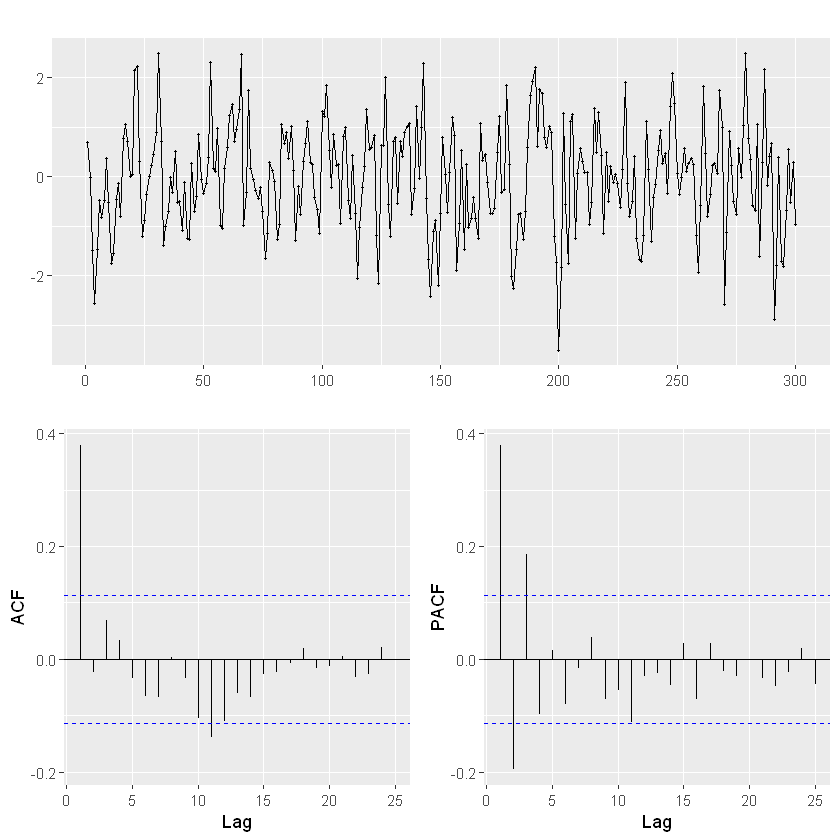

In [1]:
library(forecast)
library(ggplot2)
library(urca)

# 계수값 세타가 0.6인 AR(1) 시계열 생성
set.seed(12)
MA_1 <-arima.sim(list(order = c(0,0,1), ma = 0.6), n = 300)   #데이터생성

# 데이터 나누기 Train data : 시작 250개,  Test data : 마지막 50개
train <- window(MA_1, start=1, end=250)
test <- window(MA_1, start=251, end=300)

# ACF와 PACF를 통해 모형식별 및 원데이터 그려 눈으로 먼저 식별
ggtsdisplay(MA_1)

# KPSS 통계검정 활용
summary(ur.kpss(train))

In [2]:
# KPSS로부터 귀무가설 채택
# correlogram상의 MA(1)에 해당
# 학습데이터를 가지고 모수 추정(자동으로 식별된 모형과 비교 예정)
MA_1_fit <- Arima(train, order=c(0,0,1))
auto_fit <- auto.arima(train)

# se, mean, ma1 확인
MA_1_fit
auto_fit

Series: train 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
         ma1     mean
      0.5465  -0.0151
s.e.  0.0531   0.0907

sigma^2 estimated as 0.8695:  log likelihood=-336.42
AIC=678.84   AICc=678.94   BIC=689.41

Series: train 
ARIMA(0,0,1) with zero mean 

Coefficients:
         ma1
      0.5465
s.e.  0.0531

sigma^2 estimated as 0.8661:  log likelihood=-336.44
AIC=676.87   AICc=676.92   BIC=683.91


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 5.0361, df = 8, p-value = 0.7537

Model df: 2.   Total lags used: 10



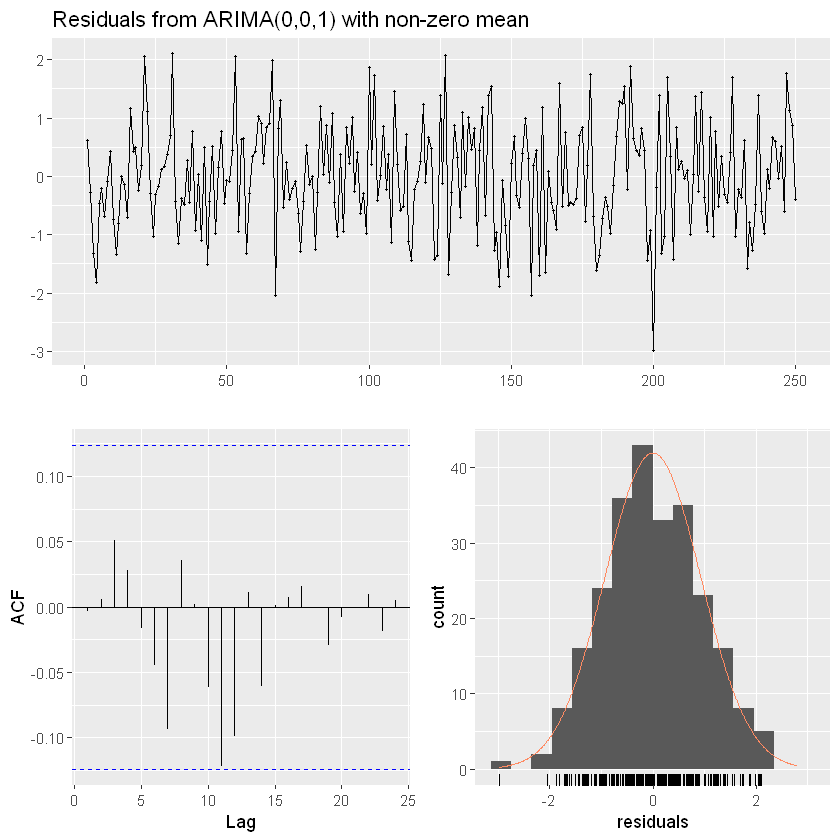


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with zero mean
Q* = 5.0355, df = 9, p-value = 0.8312

Model df: 1.   Total lags used: 10




	Box-Ljung test

data:  MA_1_fit$residuals
X-squared = 5.0361, df = 10, p-value = 0.8888



	Box-Ljung test

data:  auto_fit$residuals
X-squared = 5.0355, df = 10, p-value = 0.8888


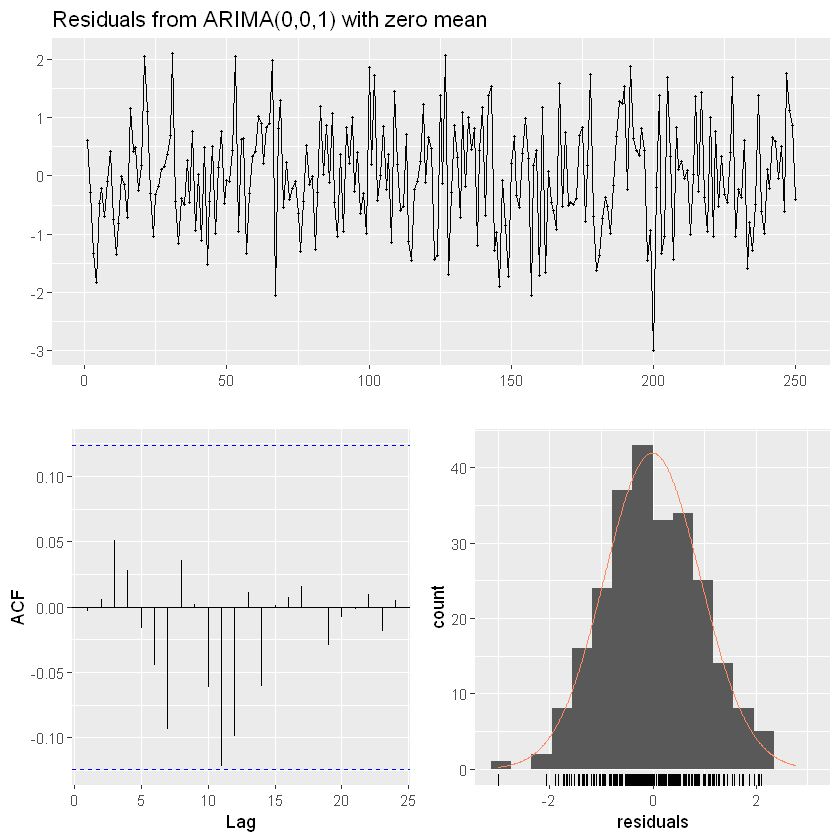

In [3]:
# 적합성 진단 way1
checkresiduals(MA_1_fit)
checkresiduals(auto_fit)

# 적합성 진단 way2
Box.test(MA_1_fit$residuals, lag=10, type="Ljung-Box")
Box.test(auto_fit$residuals, lag=10, type="Ljung-Box")

In [4]:
# Ljungbox로부터 귀무가설 채택
# 예측
MA_1_fore <- forecast(MA_1_fit, h=50)
auto_fore <- forecast(auto_fit, h=50)

# 예측 성과
accuracy(MA_1_fore, test)
accuracy(auto_fore, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.0008659712,0.928706,0.7543535,85.48332,164.35061,0.8350155,-0.003145737,NA
Test set,-0.0686274440,1.112753,0.8528444,95.63691,97.10179,0.9440379,0.189168340,1.002757


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.01061377,0.928757,0.7547971,85.02011,164.66347,0.8355066,-0.003188997,NA
Test set,-0.08357850,1.113769,0.8513483,98.78963,98.78963,0.9423818,0.189174841,0.9871296



	Ljung-Box test

data:  Residuals from Mean
Q* = 54.755, df = 9, p-value = 1.356e-08

Model df: 1.   Total lags used: 10




	Box-Ljung test

data:  m$residuals
X-squared = 54.755, df = 10, p-value = 3.508e-08


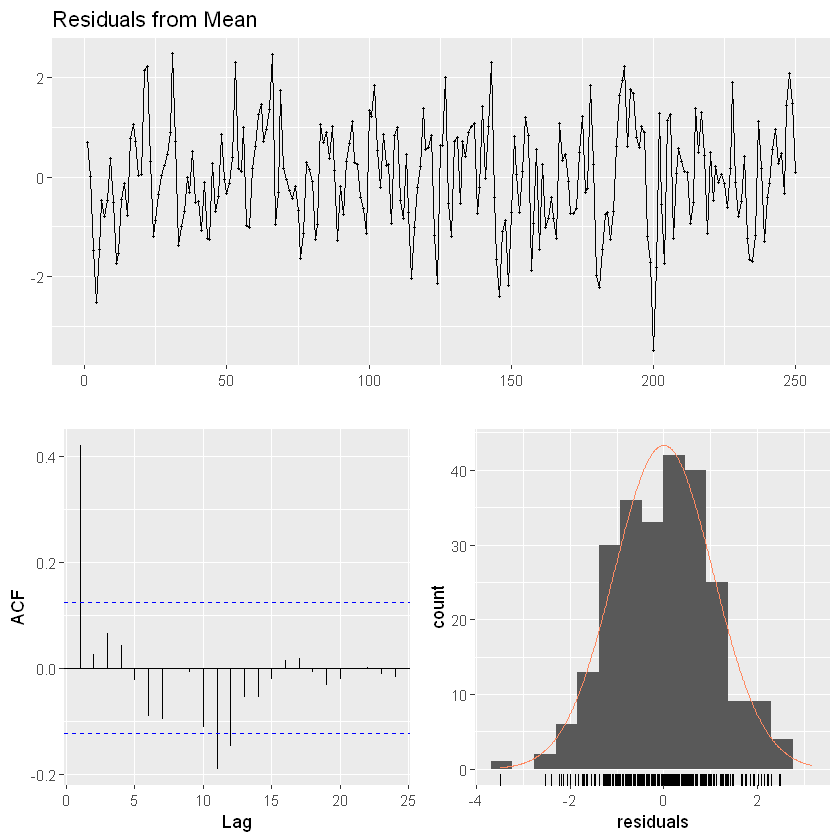

In [5]:
# meanf 모형 적합시키기
m <- meanf(train,h=50)

# 적합성 진단 way1
checkresiduals(m)

# 적합성 진단 way2
Box.test(m$residuals, lag=10, type="Ljung-Box")

In [6]:
# 예측 성과
accuracy(m, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-1.110399e-17,1.057064,0.8558607,100.64924,101.03023,0.9473767,0.4213106,NA
Test set,-7.253557e-02,1.113647,0.8571675,96.74196,98.43172,0.9488233,0.1887699,1.003128



	Ljung-Box test

data:  Residuals from Random walk
Q* = 49.258, df = 10, p-value = 3.654e-07

Model df: 0.   Total lags used: 10




	Box-Ljung test

data:  n$residuals
X-squared = 49.258, df = 10, p-value = 3.654e-07


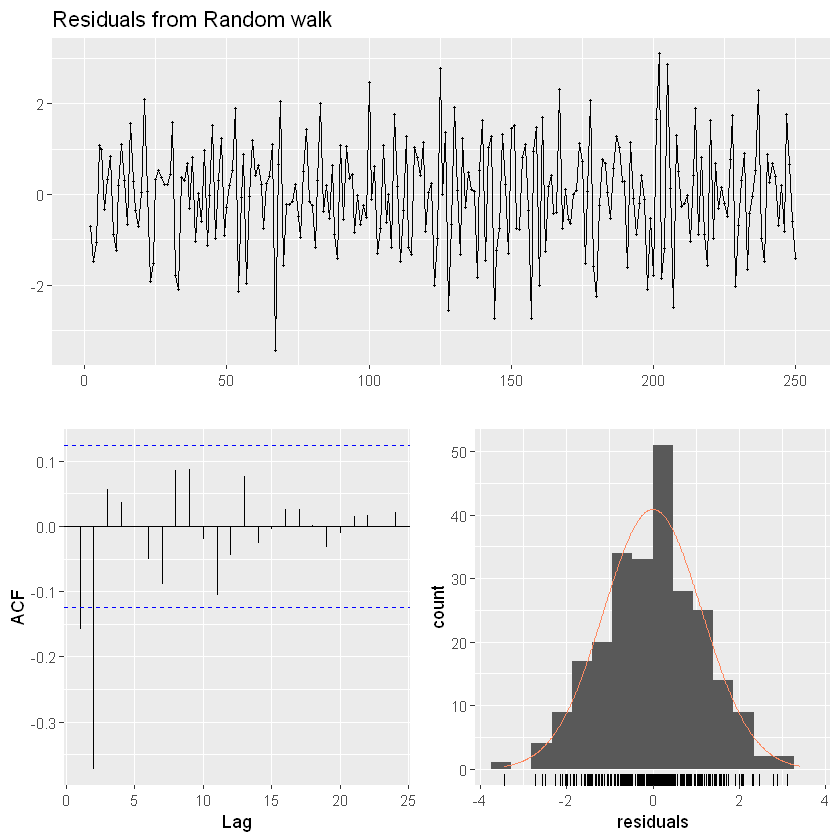

In [7]:
# naive 모형 적합시키기
n <- rwf(train,h=50)

# 적합성 진단 way1
checkresiduals(n)

# 적합성 진단 way2
Box.test(n$residuals, lag=10, type="Ljung-Box")

In [8]:
# 예측 성과
accuracy(n, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.002478136,1.138600,0.9034006,57.66498,285.2070,1.0000000,-0.1584735,NA
Test set,-0.159724817,1.122703,0.8505228,115.16848,116.1018,0.9414681,0.1887699,0.913181


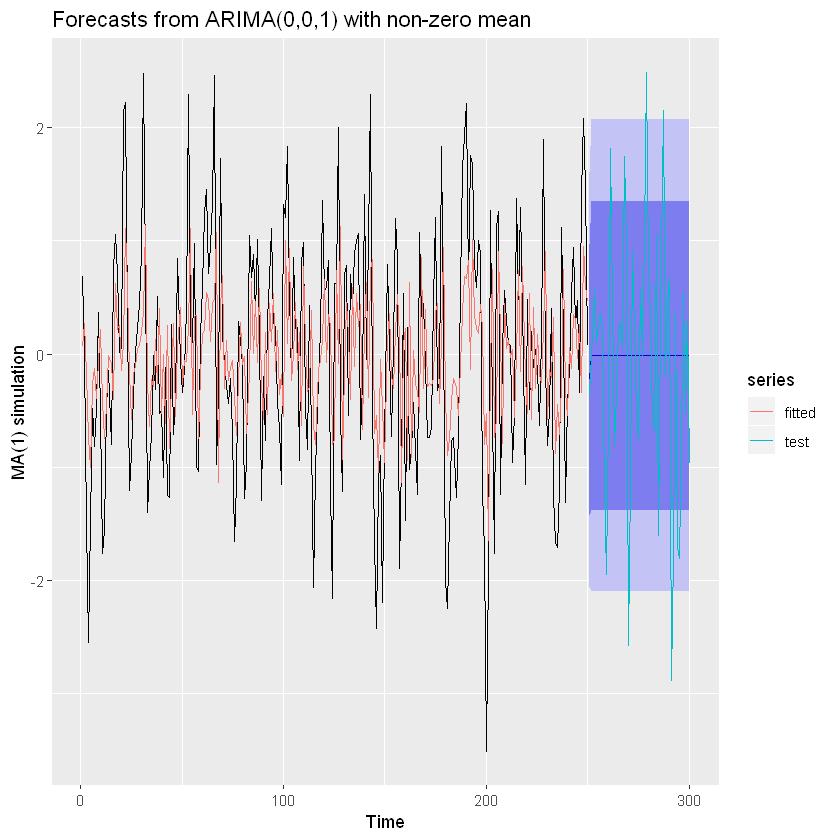

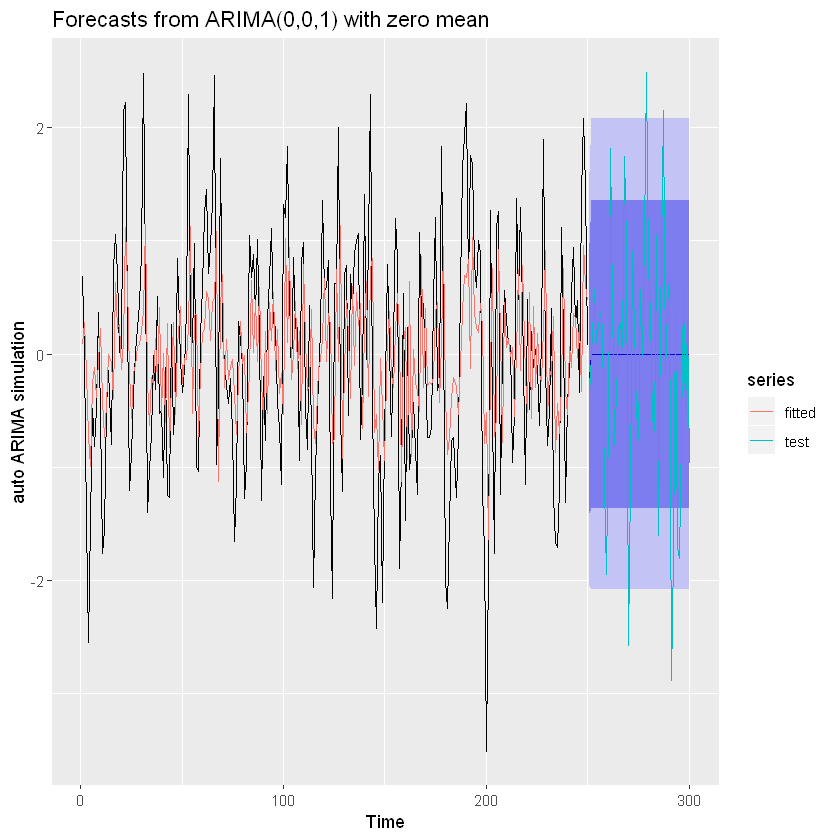

Warning message:
"Removed 1 rows containing missing values (geom_path)."


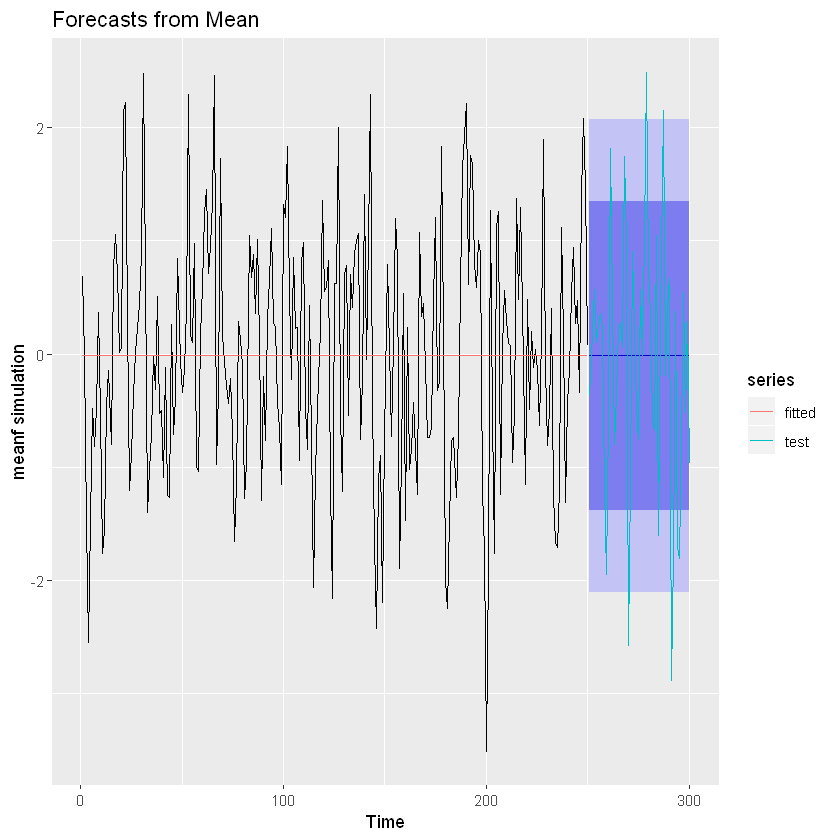

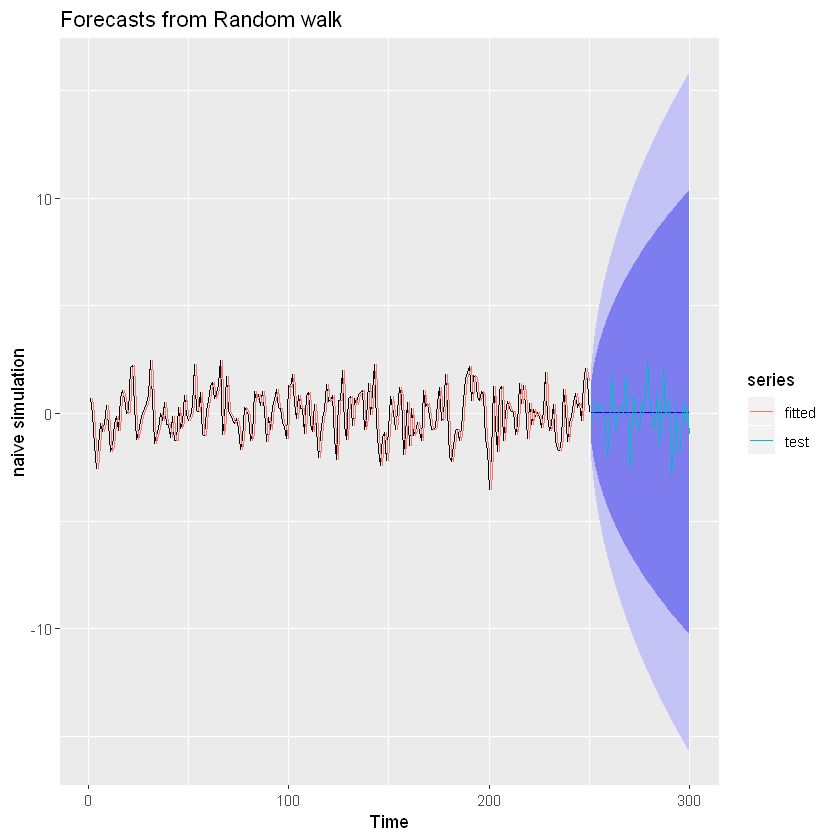

In [9]:
# 적합 및 예측값 차트로 표현하기
autoplot(MA_1_fore)+autolayer(fitted(MA_1_fore),series="fitted")+xlab("Time") + ylab("MA(1) simulation") + autolayer(test)
autoplot(auto_fore)+autolayer(fitted(auto_fore),series="fitted")+xlab("Time") + ylab("auto ARIMA simulation") + autolayer(test)

autoplot(m)+autolayer(fitted(m), series="fitted")+xlab("Time")+ylab("meanf simulation") + autolayer(test)
autoplot(n)+autolayer(fitted(n), series="fitted")+xlab("Time")+ylab("naive simulation") + autolayer(test)